In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?,NaN,NaN,NaN
6164,ham,"Hi Emma, sorry I missed your call earlier. I w...",NaN,NaN,NaN
210,ham,"What's up bruv, hope you had a great break. Do...",NaN,NaN,NaN
5605,spam,Act quickly to avoid missing this incredible d...,NaN,NaN,NaN
4707,ham,"Did you say bold, then torch later. Or one tor...",NaN,NaN,NaN


In [71]:
df.shape

(6344, 5)

# Work Flow

1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprosessing (Vectorization, Stemming, Removing stopwords etc)
4. Model Building
5. Evaluation of the model
6. Improvement of the model depending on evaluation
7. Making a website for this model
8. Deploy this website on Heroku

## Data Cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6344 entries, 0 to 6343
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6344 non-null   object
 1   v2          6344 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 247.9+ KB


In [73]:
# drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [74]:
# renaming columns
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [75]:
# labelling the labels (target variable)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])         # ham= 0, spam = 1

df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df['label'].value_counts()

label
0    5025
1    1319
Name: count, dtype: int64

In [77]:
# checking for missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [78]:
# checkfor duplicates
df.duplicated().sum()

537

In [79]:
# remove the 403 duplicates
# this method is to remove duplicate rows from df, keeping only the first occurrence of each duplicate.
df = df.drop_duplicates(keep='first')

In [80]:
df.duplicated().sum()

0

In [81]:
df.shape

(5807, 2)

In [82]:
df['label'].value_counts()

label
0    4692
1    1115
Name: count, dtype: int64

## EDA

In [83]:
df['label'].value_counts() # spam is less than ham, which is not good. Data is imbalanced.

label
0    4692
1    1115
Name: count, dtype: int64

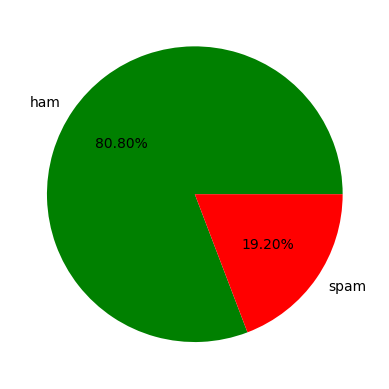

In [84]:
# visualizing this using pie chart
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', colors=['green', 'red'])
plt.show()

In [85]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SUBHANKAR
[nltk_data]     BISWAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Here we shall create 3 new columns

In [86]:
# a new column having numbers of chars in the message
df['num_chars'] = df['message'].apply(len)
df.head(5)

,label,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [87]:
# number of words in the message
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [88]:
# number of sentences in the message
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head(5)

,label,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [89]:
#getting insignts based on ham
df[df['label'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4692.000000,4692.000000,4692.000000
mean,108.691603,24.263214,2.216965
std,265.132166,50.431407,3.029983
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,23.000000,2.000000
max,1984.000000,369.000000,38.000000


In [90]:
#getting insignts based on spam
df[df['label'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,1115.000000,1115.000000,1115.000000
mean,206.933632,38.483408,3.366816
std,292.022713,49.683057,2.907455
min,13.000000,2.000000,1.000000
25%,74.000000,15.000000,2.000000
50%,138.000000,27.000000,2.000000
75%,157.000000,32.000000,4.000000
max,1158.000000,208.000000,12.000000


<Axes: xlabel='num_chars', ylabel='Count'>

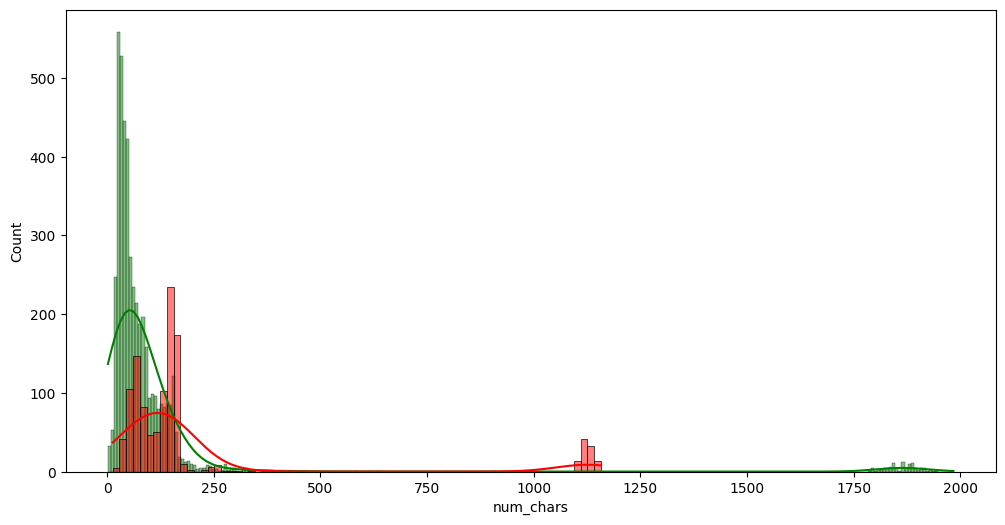

In [91]:
# so we can see that spam messages are longer than ham messages, on average.
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_chars'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_chars'], color='red', label='spam', kde=True)

<Axes: xlabel='num_words', ylabel='Count'>

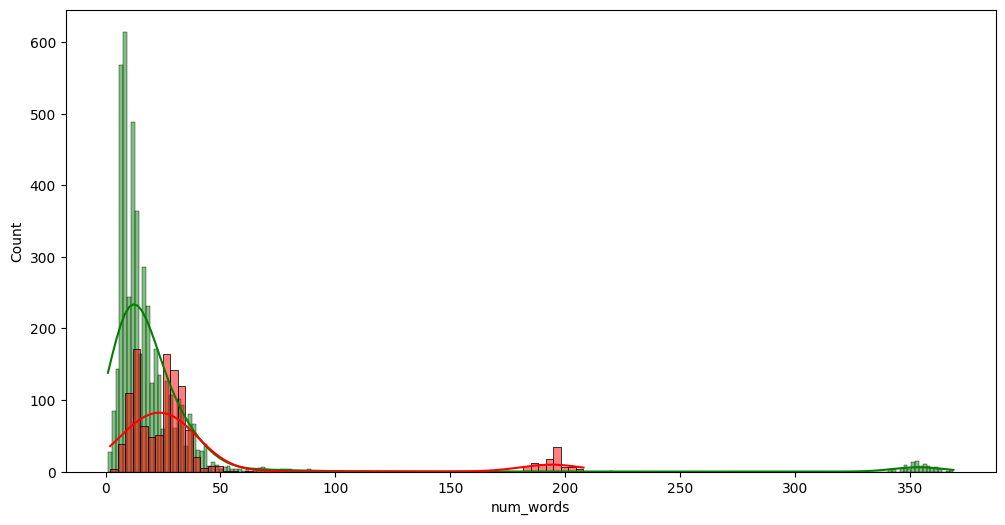

In [92]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='green', label='ham', kde=True)
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='spam', kde=True)

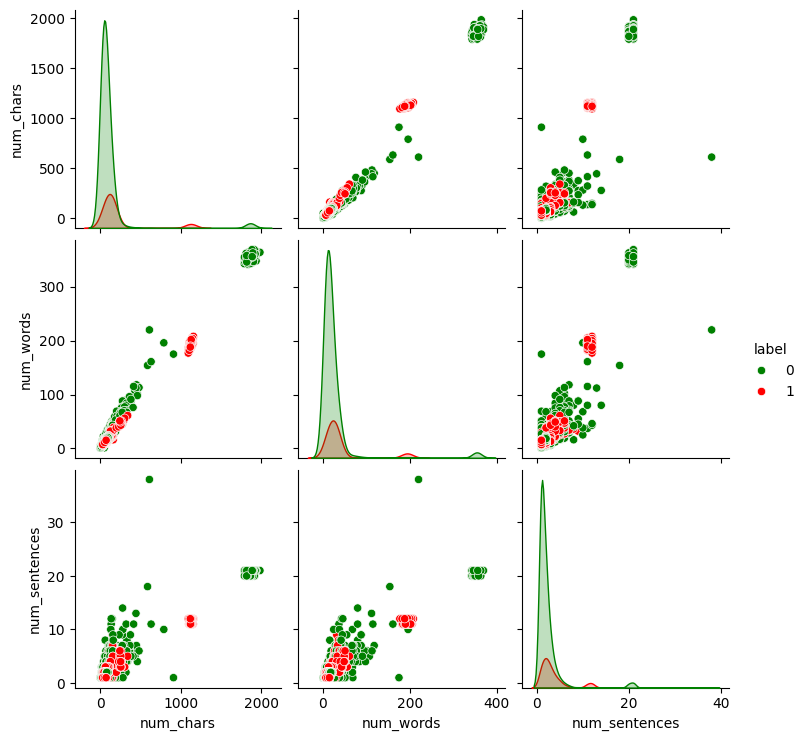

In [93]:
sns.pairplot(df, hue='label', palette=['green', 'red'])

<Axes: >

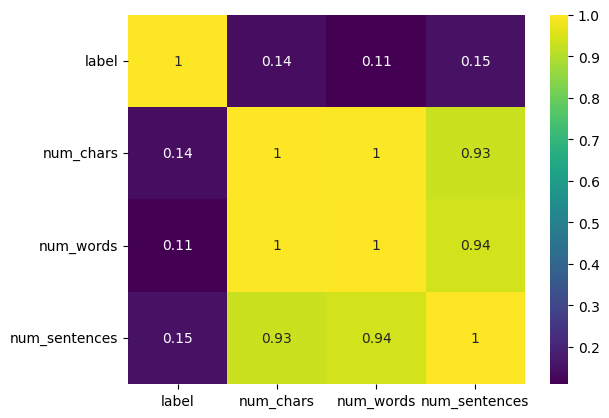

In [94]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

## Text Preprocessing

1. Lower Case
2. Tokenization
3. Removing Special Chars
4. Removing stop words and puntuations
5. Stemming or lemmatization (removing wrods of similar meaning- play, playing, placed ==> play)

In [95]:
# removing punctuations and stopwords
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [96]:
def transform_text(text):
    text = text.lower()  # convert to lowercase
    text = nltk.word_tokenize(text)  # tokenize the text eg- ['hello', 'how', 'are', 'you']
    
    y = []
    # stopwords and puntuation removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            # if the word is not a stopword and not a punctuation, keep it
            y.append(i)
            
    text = y[:]
    y.clear()  # clear the list for reuse
    for i in text:
        if i.isalnum():
            y.append(i)  # keep only alphanumeric characters
            
    text = y[:]
    y.clear()
    # lemmatization
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [97]:
transform_text("There is a huge discount on the product, don't miss it!")

'huge discount product miss'

In [98]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [99]:
transform_text(df['message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [100]:
df['cleaned_message'] = df['message'].apply(transform_text)

In [101]:
df.head(5)

,label,message,num_chars,num_words,num_sentences,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [102]:
# top 50 words in spam messages in a list
spam_corpus = []
for message in df[df['label'] == 1]['cleaned_message'].tolist():
    for word in message.split():
        spam_corpus.append(word)


In [103]:
len(spam_corpus)

21570

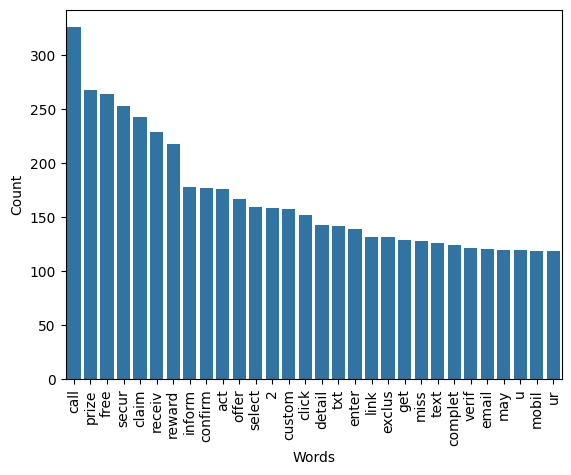

<Figure size 2000x800 with 0 Axes>

In [104]:
from collections import Counter
spam_counter = Counter(spam_corpus)
spam_words_df = pd.DataFrame(spam_counter.most_common(30))
sns.barplot(x=spam_words_df[0], y=spam_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
figsize=(20, 8)
plt.figure(figsize=figsize)
plt.show()

In [105]:
pd.DataFrame(spam_counter.most_common(30)).head(5)

,0,1
0,call,326
1,prize,268
2,free,264
3,secur,253
4,claim,243


## Model Building and Evaluation

### 1. Naive Bayes Classifier

In [165]:
# Here out input (cleaned _message) is in text format, we need to convert it into a numerical format. That is, we need to vectorize the text data.
# Using BagOfWords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4000) #parameter tuning using max_features to limit the number of features to 3000
# X = cv.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix
X = tfidf.fit_transform(df['cleaned_message']).toarray()  # convert to dense array from sparse matrix

In [166]:
X.shape # (5169, 6708)  # 5169 messages, 6708 unique words

(5807, 4000)

In [167]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
# Scaling X (model performance improvement)
# later we saw no substantial difference in performance with and without scaling, so we commented it out.
# from sklearn.preprocessing import MinMaxScaler
# # we have used MinMaxScaler not StandardScaler as StandardScalar gives -ve values which NB don't take.
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [169]:
y = df['label'].values  # target variable
y

array([0, 0, 1, ..., 1, 1, 1])

In [170]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [171]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

Training the models

In [173]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred1))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred1))
print("GaussianNB Precision:", precision_score(y_test, y_pred1))


GaussianNB Accuracy: 0.8364888123924269
GaussianNB Confusion Matrix:
 [[787 152]
 [ 38 185]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       939
           1       0.55      0.83      0.66       223

    accuracy                           0.84      1162
   macro avg       0.75      0.83      0.78      1162
weighted avg       0.88      0.84      0.85      1162

GaussianNB Precision: 0.5489614243323442


In [174]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("MultinominalNB Accuracy:", accuracy_score(y_test, y_pred2))
print("MultinominalNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("MultinominalNB Classification Report:\n", classification_report(y_test, y_pred2))
print("MultinominalNB Precision:", precision_score(y_test, y_pred2))

MultinominalNB Accuracy: 0.9621342512908778
MultinominalNB Confusion Matrix:
 [[935   4]
 [ 40 183]]
MultinominalNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.98      0.82      0.89       223

    accuracy                           0.96      1162
   macro avg       0.97      0.91      0.93      1162
weighted avg       0.96      0.96      0.96      1162

MultinominalNB Precision: 0.9786096256684492


In [175]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("BernouliNB Accuracy:", accuracy_score(y_test, y_pred3))
print("BernouliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("BernouliNB Classification Report:\n", classification_report(y_test, y_pred3))
print("BernouliNB Precision:", precision_score(y_test, y_pred3))

BernouliNB Accuracy: 0.9509466437177281
BernouliNB Confusion Matrix:
 [[939   0]
 [ 57 166]]
BernouliNB Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       939
           1       1.00      0.74      0.85       223

    accuracy                           0.95      1162
   macro avg       0.97      0.87      0.91      1162
weighted avg       0.95      0.95      0.95      1162

BernouliNB Precision: 1.0


So we have choosen mnb with tfidf.

### Save the model MultinominalNB

In [177]:
import pickle
# Saving the vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model_mnb.pkl', 'wb'))